#### Definition

An $n \times n$ matrix $A$ is __convergent__ if

$$\lim_{k\to \infty} (A^k)_{ij} = 0,$$

for all $1 \leq i,j\leq n$.

#### Theorem

The following statements are equivalent:

1. $A$ is a convergent matrix
2. $\lim_{n\to \infty} \|A^n\| = 0$, for some induced norm
3. $\lim_{n \to \infty} \|A^n\| = 0$, for all induced norms
4. $\rho(A) < 1$
5. $\lim_{n\to\infty} A^n x = 0$ for every $x \in \mathbb R^n$
6. Given an induced norm $\|\cdot\|$, $\|A^n\| = O((1+\delta)^{-n})$, for some $\delta > 0$.

#### Gershgorin Circle Theorem

Let $A$ be an $n\times n$ matrix and let $R_i$ denote the circle in the complex plane $\mathbb C$ with center $a_{ii}$ and radius $\sum_{j\neq i} |a_{ij}|$:

$$R_i = \left\{ z \in \mathbb C : |z-a_{ii}| \leq \sum_{j \neq i} |a_{ij}| \right\}.$$

Then all of the eigenvalues of $A$ are contained in the union $\bigcup_i R_i$.

#### Proof

Suppose $\lambda$ is an eigenvalue with assoicated eigenvector $v$.  We need to show that $\lambda \in R_i$ for some $i$.  We normalize $\|x\|_\infty = 1$.  The eigenvalue equation gives $Ax = \lambda x$ or

$$ \sum_{j=1}^n a_{ij} x_j = \lambda x_j, \quad 1 \leq i \leq n.$$

Let $k$ be the smallest integer such that $|x_k| = 1$.  Consider the above equation for this value of $k$:

$$ \sum_{j=1}^n a_{kj} x_j = \lambda x_k$$
$$ ( \lambda - a_{kk}) x_k = \sum_{j\neq k} a_{kj} x_j$$
$$ |\lambda - a_{kk}| |x_k| \leq \sum_{j\neq k} |a_{kj}| |x_j|$$
$$ |\lambda - a_{kk}| \leq \sum_{j\neq k} |a_{kj}|.$$

This shows that $\lambda \in R_k$ and therefore $\lambda \in \bigcup_i R_i$.  This holds for every eigenvalue.

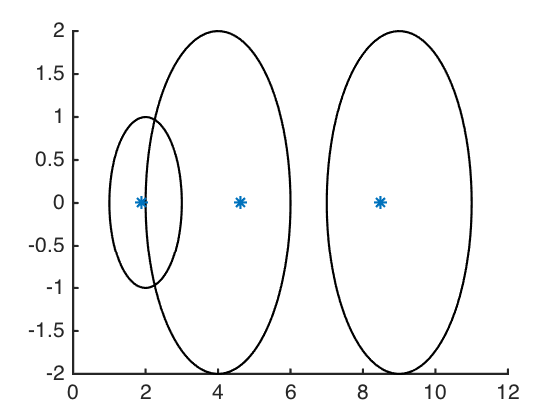

In [21]:
hold on
%A = [10 2 3 1; 1 -3 1 -1; -1 -3 -1 4; 2 2 2 5];
%A = rand(10)-1/2; A = A + 1j*(rand(10)-1/2);
A = [4,1,1;0,2,1;-2,0,9];
for i = 1:length(A)
    a = A(i,i); r = norm(A(i,:),1)-abs(a);
    theta = linspace(0,2*pi,100);
    x = r*cos(theta); y = r*sin(theta);
    plot(x+real(a),y + imag(a),'k')
end
lambda = eigs(A);
plot(real(lambda),imag(lambda),'*')

#### Example

Estimate the spectral radius of $A$ using the Gershgorin Circle Theorem

$$ A = \begin{bmatrix} 4 & 1 & 2 \\ 0 & 2 &1 \\ 2 & 1 & 9 \end{bmatrix}.$$

## Simple iteration

We want to solve the equation $Ax = b$, or find the root of $Ax - b$.  Recall that every root-finding problem has equivalent, associated fixed-point iterations.  If $x$ is a solution of $Ax = b$ then $x$ satisfies

$$x = (I - A)x + b.$$

Define $T = I -A$, and we want to find a fixed point of

$$g(x) = Tx + b.$$

In [20]:
A = [1.1 .1 .3 .4; .2 .9 -.1 .33; -.3 .4 1. .8; .1 .2 .3 1];
b = [1 1 1 1]';
T = eye(4)-A;
x = [0 0 0 0]';
for i = 1:20
    x = T*x + b;
end
A*x-b

ans =

   1.0e-04 *

   -0.9116
   -0.4433
   -0.6195
   -0.5963


This leads to the natural question:

Given a matrix $T$ and an initial vector $x^{(0)}$, when does the fixed point method given by

$$g(x) = Tx + b$$

converge?

Fortunately, the spectral radius allows us to answer this question in a fairly simple manner:

#### Lemma 

If the spectral radius of $T$ satisfies $\rho(T) < 1$, then $(I-T)^{-1}$ exists and

$$(I-T)^{-1} = \sum_{k=0}^\infty T^k.$$

#### Proof

First, if $(I-T)$ is invertible if and only if it has a trivial nullspace or $(I-T)v = 0$ if and only if $v = 0$.  If $v$ is not zero, then $\lambda = 1$ would be an eigenvalue of $T$, but $\rho(T) < 1$.  Thus $(I-T)^{-1}$ exists.  Then for any induced norm, consider

$$\left\| (I-T)^{-1} - \sum_{j=0}^k T^j \right\| = \left\|(I-T)^{-1} \left( I - (I-T) \sum_{j=0}^k T^j \right) \right\| \leq \left\|(I-T)^{-1} \right\| \left\| I - (I-T) \sum_{j=0}^k T^j \right\|. $$

Now, we examine this last factor

$$I - (I-T) \sum_{j=0}^k T^j = I - \sum_{j=0}^k T^j + \sum_{j=0}^k T^{j+1} = T^{k+1}.$$

Then, because $T$ is a convergent matrix $\|T^{k+1}\| \to 0$ as $k \to \infty$.  This shows

$$ \lim_{k \to \infty} \left\| (I-T)^{-1} - \sum_{j=0}^k T^j \right\| = 0.$$

Then because convergence in matrix norm implies that individual entries converge, we obtain

$$(I-T)^{-1} = \sum_{j=0}^\infty T^j,$$

as required.